In [2]:
# import all the necessary libraries and functions
import cv2
import os
from data_utils_local03 import *
import tensorflow as tf
from ConvoAutoencoder import ConvoAutoencoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# start interactive tensorflow session
sess = tf.InteractiveSession()

In [4]:
# rejuvenate the trained variables
reawakened = tf.train.import_meta_graph('ckpts/-13.meta')
reawakened.restore(sess, tf.train.latest_checkpoint('ckpts/'))

INFO:tensorflow:Restoring parameters from ckpts/-14


In [5]:
# creating our autoencoder
autoencoder = ConvoAutoencoder()

In [6]:
# create the input_image list
input_image = []
# grab an arbitrary frame from movie 08
frame = get_frm_folder('data_frames/08/frame5033.jpg')
# reshape this frame
new_img = downsize_forAuto(frame)
# divide pixel values by 255
# can I convert this thing into an array?
input_img = np.array(new_img, dtype = np.float32)
input_img = np.multiply(input_img, 1.0 / 255.0)

print(input_img)
input_image.append(input_img)
# visualize the input
#cv2.imshow("input", downsize_forAuto(frame))
#cv2.waitKey(0)
#print(input_image.shape)

[[[ 0.47058827  0.4784314   0.50980395]
  [ 0.50588238  0.51372552  0.54509807]
  [ 0.48235297  0.51372552  0.5411765 ]
  ..., 
  [ 0.01568628  0.01176471  0.01960784]
  [ 0.          0.00784314  0.01176471]
  [ 0.02745098  0.03529412  0.03921569]]

 [[ 0.40784317  0.41568631  0.44705886]
  [ 0.50196081  0.50980395  0.5411765 ]
  [ 0.42745101  0.45882356  0.48627454]
  ..., 
  [ 0.01568628  0.01568628  0.01568628]
  [ 0.01176471  0.01176471  0.01176471]
  [ 0.03137255  0.02352941  0.02352941]]

 [[ 0.45490199  0.4666667   0.49019611]
  [ 0.49803925  0.50980395  0.53333336]
  [ 0.49411768  0.52549022  0.54901963]
  ..., 
  [ 0.01568628  0.01568628  0.01568628]
  [ 0.01960784  0.00784314  0.00784314]
  [ 0.02745098  0.03529412  0.03529412]]

 ..., 
 [[ 0.35294119  0.46274513  0.4666667 ]
  [ 0.37647063  0.49411768  0.49803925]
  [ 0.38823533  0.50588238  0.52156866]
  ..., 
  [ 0.41960788  0.49411768  0.50588238]
  [ 0.41568631  0.49019611  0.50196081]
  [ 0.3921569   0.4666667   0.47843

In [7]:
# creating a reconstruction of the input image
out = autoencoder.reconstruct_image(sess, input_image)

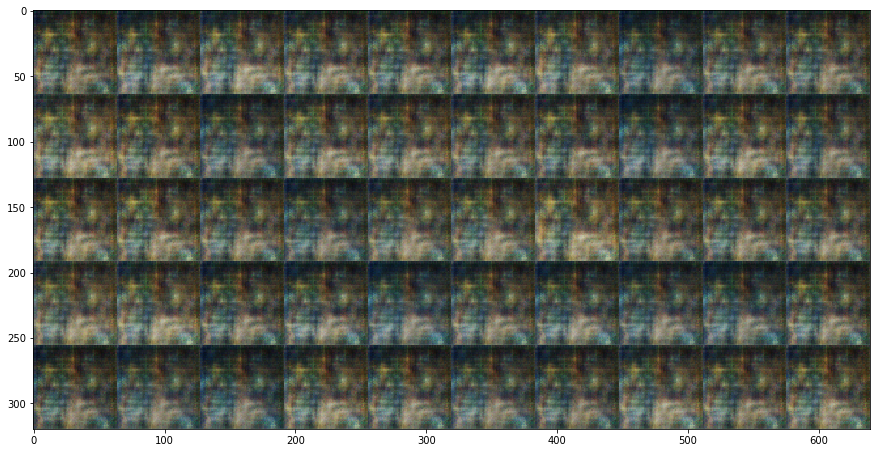

In [8]:
# visualizing this reconstruction
#cv2.imshow('out', out)
#cv2.waitkey(0)

# now for the plotting! 
w = 10
h = 5
figure = np.zeros([64 * h, 64 * w, 3], dtype = np.uint8)
k = 0
for i in range(h):
    for j in range(w):
        image = np.reshape(out[k], [64, 64, 3])
        figure[i * 64: (i + 1) * 64,
               j * 64: (j + 1) * 64,
               :] = image
        k += 1
    
plt.figure(figsize=(15, 15))
plt.imshow(figure)
plt.show()